<a href="https://colab.research.google.com/github/quamernasim/YOLO-Wrold-See-Beyond-Labels/blob/main/yolo-world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Have you ever felt stuck when a object detection model fails to identify an object because it's not trained on it? Or have you ever felt frustrated when you have to train a new model from scratch to identify a new object? Not anymore! YOLO-World comes to save the day. It's a object detection model that can identify any object you want, provided that you provide a image description to it. It's a model that can see beyond labels.

YOLO-World, developed by Tencent AI Lab - Computer Vision Center (https://ai.tencent.com/ailab/en/about/), is an novel object detection model which can identify objects in an offline-vocabulary setting. It is a fusion of vision and language models, which can identify objects based on a textual description. In a nutshell, it fuses the features extracted from vision model with that of embeddings extrcated from language model, to userstand the correlation between image and it's description. This type of fusion between text and image allows for recognition of objects that are not present in the training data, and also allows for better understanding of the context of the image.

YOLO-World was developed to address the limtations of Fixed-Vocabulary Detectors and Detector that use Online-Vocabulary during inferecing. What YOLO-World does is it used Open-Vocabulary instead of Fixed-Vocabulary, but it doesn't stop there. It also uses Offline-Vocabulary instead of Online-Vocabulary during inferecing. Now You must be wondering and getting confised with all these fixed, ope, online and offline vocabularies. Let me explain them to you.


Fixed-Vocabolary Detectors can only identify objects present in the training data simply because they are trained on a fixed set of categories. New objects cannot be detected in the training data. These are basically traditional detectors that we use in everyday life. So the biggest drawback - the model can't find anything that isn't in the training data.

Open-Vocabolary Detectors solve the problem we had previously with Fixed-Vocabolary Detectors. New categories can be identified in the training data. Generally this is acheived via fusion with language/prompt encoders. It basically encodes the prompt given by user and uses these embeddings along with features extracted from image to identify the object. [[23, 29, 53, 56]]

Online-Vocabolary Detectors uses the open-vocabolary settings we just saw, basically encoding the prompt given by user to create an open-vocabolary and detect object usingv these vocaboralies. But this again has a drawback. These types of model rely on heavy backbones to increase the open vocabolary capacity. This makes the model heavy and slow.

So, what's the next logical step is to somehow make it light, fast and yet open coabolary. How's that done? well you just train your model in the same online vocabolary setting but while inferecing, you just switch to offline vocaboray setting. Pretty simple, right? This is what YOLO-World does. It uses open-vocabolary setting during training and offline-vocabolary setting during inferecing. This makes the model fast and suitable for real-world applications.



Let's now get into the detailes of the model archutecture. 
Instead of relying soley on the bounding boxes, YOLO-World uses something called region-text pairs. Imagine dividing an image into areas, each assigned a textual description that highlights specific features or features. This provides a deeper understanding of the whole image and its content placement.

YOLO-World, essentially has three components. It's insipired from YOLO v8, and has a Darknet as backbone, Path Aggregation Network (PAN) and Bounding Box Regression & Object Embeddings. Let's get into the details of each of these components.Darknet feature extractor, first proposed in YOLO9000 paper, is a convolutional neural network that serves as the image encoder in the YOLO-World model. It is a 53-layer deep neural network that is trained on ImageNet dataset. It is used to extract visual features from the input image. Then we have text encoder, based on CLIP, which is used to extract embeddings from the textual description of the image. CLIP is a neural network that learns to associate images and their textual descriptions jointly understanding the correlation between the two. Once we've multi-scale feature vector from YOLOv8 and vocabolary embeddings from CLIP model, we pass them to somehting called Vision-Language Path Aggregation Network (VS-PAN). This is a novel network that fuses the visual and textual features to understand the correlation between the image and it's description or user prompt. VS-PAN layer gives essentially 3 things, image-aware text embeddings, bounding boxes and object embeddings. Now remeber we talked about region-text pairs? This is where they come into play. The image aware text embeddings and object embeddings extracted from VS-PAN layers are used to create region-text pairs. These pairs are then used to find the similarity between the object in a region and it's desctiption. This is what they've called contrastive head. Based on the similary, along with non max supression, the model is able to identify the object in the image. Pretty cool, right? It isn't over yet. The neat trick is still to come. The model is trained in open-vocabolary setting, but during inferecing, it uses offline-vocabolary setting. This makes the model fast and suitable for real-world applications. This is what makes YOLO-World unique and powerful. It's a model that can see beyond labels.

# Install the Dependencies

- https://arxiv.org/pdf/2401.17270.pdf
- https://github.com/AILab-CVC/YOLO-World
- https://huggingface.co/spaces/stevengrove/YOLO-World
- https://colab.research.google.com/drive/1AmhbXBmH2MnJA8_aQ5EDoormQ61xlzdp#scrollTo=YQ86d81wVGMe
- https://twitter.com/skalskip92/status/1754916529672438173

In [ ]:
!pip install supervision==0.18.0
!pip install requests==2.28.2 tqdm==4.65.0 rich==13.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
  Attempting uninstall: rich
    Found existing installation: rich 13.7.0
    Uninstalling rich-13.7.0:
      Successfully uninstalled rich-13.7.0
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into

Let's start with installing all the dependencies. We're first going to clone two excellent repo from Onuralp SEZER, named MMYOLO and YOLO-World. MMYOLO is an open source toolbox for YOLO series algorithms based on PyTorch and MMDetection. It is a part of the OpenMMLab project. And YOLO-World contains the PyTorch implementation, pre-trained weights, and pre-training/fine-tuning code for YOLO-World.

In [ ]:
!git clone https://github.com/onuralpszr/mmyolo.git -b version/mmcv
%cd mmyolo/
!pip install -e .
%cd /content
!git clone --recursive https://github.com/onuralpszr/YOLO-World.git -b collab_friendly
%cd YOLO-World/
!python setup.py build develop

MIM provides a unified interface for launching and installing OpenMMLab projects and their extensions, and managing the OpenMMLab model zoo.

Now let's install MIM package. MIM is a unified interface for launching and installing OpenMMLab projects and their extensions, and managing the OpenMMLab model zoo. It is a part of the OpenMMLab project. We're going to use this library to setup our YOLO-World model. This will make our life easier and we can focus on the fun part of the project.

In [ ]:
%pip install -U openmim
!mim install "mmengine>=0.7.0"
!mim install "mmcv"

Now we need to restart the kernel before we can use any of these decendencies we just installed.

In [ ]:
quit()

# Download model weights and image to test on

Now we need to download the pre-trained weights for YOLO-World model. We also need to download the image we want to test the model on. We're going to use the image of a person chasing dog with several other objects in the background. Let's download the image and the weights.

In [ ]:
!wget https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true
!wget https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/configs/pretrain/yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py?download=true
!mv yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth
!mv yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py?download=true yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py
!cp -r yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py /content/YOLO-World/configs/pretrain/
!wget -O car-chase.jpg https://github.com/quamernasim/YOLO-Wrold-See-Beyond-Labels/blob/main/car-chase-featured.jpg?raw=true

--2024-02-13 05:48:01--  https://huggingface.co/spaces/stevengrove/YOLO-World/resolve/main/yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth?download=true
Resolving huggingface.co (huggingface.co)... 13.32.208.111, 13.32.208.55, 13.32.208.73, ...
Connecting to huggingface.co (huggingface.co)|13.32.208.111|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.huggingface.co/repos/cc/e2/cce2cecbe61f2002bfd047dbb19558446e78db43c2b1c4a89071860f6eeb9a0e/c86e28e6f248ba6d5f5f83137f6968d53982c428f55e2a8c6d4edfa810c60658?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth%3B+filename%3D%22yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth%22%3B&Expires=1708062481&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwODA2MjQ4MX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmh1Z2dpbmdmYWNlLmNvL3JlcG9zL2NjL2UyL2NjZTJjZWNiZTYxZjIwM

# Getting started with YOLO-World

In [25]:
import mmengine
import yolo_world
import mmyolo
import argparse
import os.path as osp
from functools import partial
import supervision as sv
import cv2
import torch
import numpy as np
from tempfile import NamedTemporaryFile
from PIL import Image
from torchvision.ops import nms
from mmengine.config import Config, DictAction
from mmengine.runner import Runner
from mmengine.runner.amp import autocast
from mmengine.dataset import Compose
from mmdet.visualization import DetLocalVisualizer
from mmdet.datasets import CocoDataset
from mmyolo.registry import RUNNERS

In [26]:
def setup_runner(cfg):
    "Sets up the runner from mmyolo library."

    # If runner_type is not specified, use the default runner
    if 'runner_type' not in cfg:
        runner = Runner.from_cfg(cfg)
    else:
        runner = RUNNERS.build(cfg)

    # Load the model and resume from the checkpoint
    runner.call_hook('before_run')
    runner.load_or_resume()

    # Set the pipeline and model to eval mode
    pipeline = cfg.test_dataloader.dataset.pipeline
    runner.pipeline = Compose(pipeline)
    runner.model.eval()

    # Adtionally, we will use the bounding box annotator and label annotator
    bounding_box_annotator = sv.BoundingBoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
    return runner, bounding_box_annotator, label_annotator

def run_image(
    image: np.ndarray,
    text,
    cfg,
    max_num_boxes = 100,
    score_thr = 0.05,
    nms_thr = 0.5
):  
    "Runs the model on the given image and annotates the image with the predictions."
    # Set up the runner
    runner, bounding_box_annotator, label_annotator = setup_runner(cfg)

    # Save the image to a temporary file
    with NamedTemporaryFile(suffix=".jpeg") as f:
        # Save the image to the temporary file
        cv2.imwrite(f.name, image)

        # Split the prompt into texts to create an offline-vocabolary
        texts = [[t.strip()] for t in text.split(',')] + [[' ']]
        data_info = dict(img_id=0, img_path=f.name, texts=texts)

        # Use the runner pipeline from the mmyolo library to process the image and get it in batch
        data_info = runner.pipeline(data_info)
        data_batch = dict(inputs=data_info['inputs'].unsqueeze(0),
                          data_samples=[data_info['data_samples']])

        # Run the model on the image and get the predictions
        with autocast(enabled=False), torch.no_grad():
            output = runner.model.test_step(data_batch)[0]
            pred_instances = output.pred_instances

        # Apply NMS and score thresholding
        keep_idxs = nms(pred_instances.bboxes, pred_instances.scores, iou_threshold=nms_thr)
        pred_instances = pred_instances[keep_idxs]
        pred_instances = pred_instances[pred_instances.scores.float() > score_thr]
        if len(pred_instances.scores) > max_num_boxes:
            indices = pred_instances.scores.float().topk(max_num_boxes)[1]
            pred_instances = pred_instances[indices]
        pred_instances = pred_instances.cpu().numpy()

        # Create the detections object from supervision library and finally annotate the image
        detections = sv.Detections(
            xyxy=pred_instances['bboxes'],
            class_id=pred_instances['labels'],
            confidence=pred_instances['scores'],
            data={
                'class_name': np.array([texts[class_id][0] for class_id in pred_instances['labels']])
            }
        )

        labels = [
            f"{class_name} {confidence:0.2f}"
            for class_name, confidence
            in zip(detections['class_name'], detections.confidence)
        ]
        annotated_image = image.copy()
        annotated_image = bounding_box_annotator.annotate(annotated_image, detections)
        annotated_image = label_annotator.annotate(annotated_image, detections, labels)
        return annotated_image

In [27]:
cfg = Config.fromfile("/content/YOLO-World/configs/pretrain/yolo_world_l_t2i_bn_2e-4_100e_4x8gpus_obj365v1_goldg_train_lvis_minival.py")
cfg.work_dir = "."
cfg.load_from = "yolow-v8_l_clipv2_frozen_t2iv2_bn_o365_goldg_pretrain.pth"
# class_names = "person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, frisbee, skis, snowboard, sports ball, kite, baseball bat, baseball glove, skateboard, surfboard, tennis racket, bottle, wine glass, cup, fork, knife, spoon, bowl, banana, apple, sandwich, orange, broccoli, carrot, hot dog, pizza, donut, cake, chair, couch, potted plant, bed, dining table, toilet, tv, laptop, mouse, remote, keyboard, cell phone, microwave, oven, toaster, sink, refrigerator, book, clock, vase, scissors, teddy bear, hair drier, toothbrush"

02/13 06:16:38 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
02/13 06:16:38 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 351854200
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash 

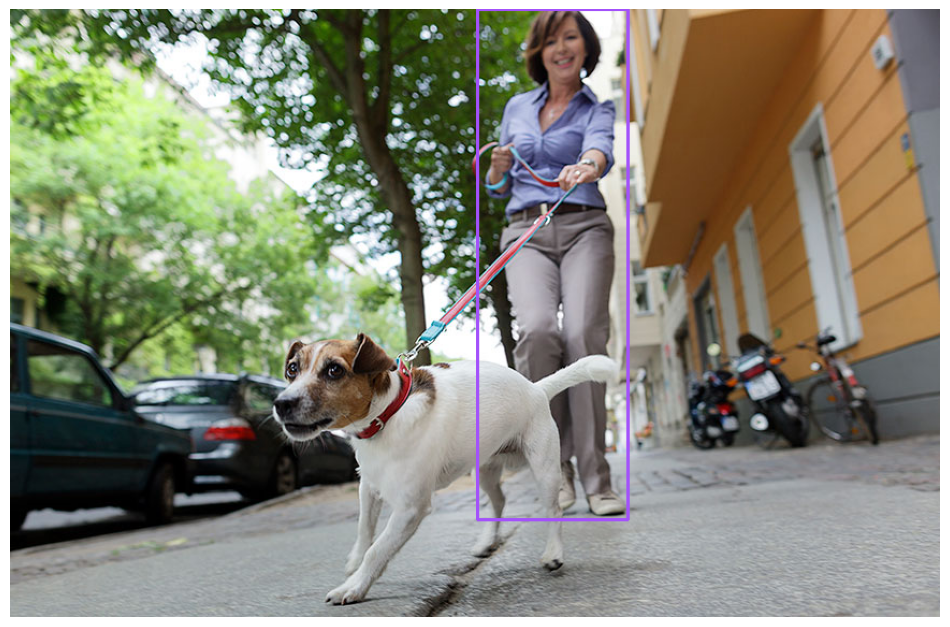

In [28]:
# Even though there are many objects present in the images, let's first start by checking if the model is able to detect the person in the image leaving the rest of the objects
class_names = "person"
image = run_image(cv2.imread('/content/car-chase.jpg') , class_names, cfg)
sv.plot_image(image)

Wonderful! Model is able to detect person based on our prompt very efficiently. Now let's see if it can detect other objects in the image, like dog.

02/13 06:16:59 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
02/13 06:16:59 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1238777807
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash

/usr/local/lib/python3.10/dist-packages/mmengine-0.10.3-py3.10.egg/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


02/13 06:17:05 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/13 06:17:05 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(9           ) YOLOv5ParamSchedulerHook           
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHo

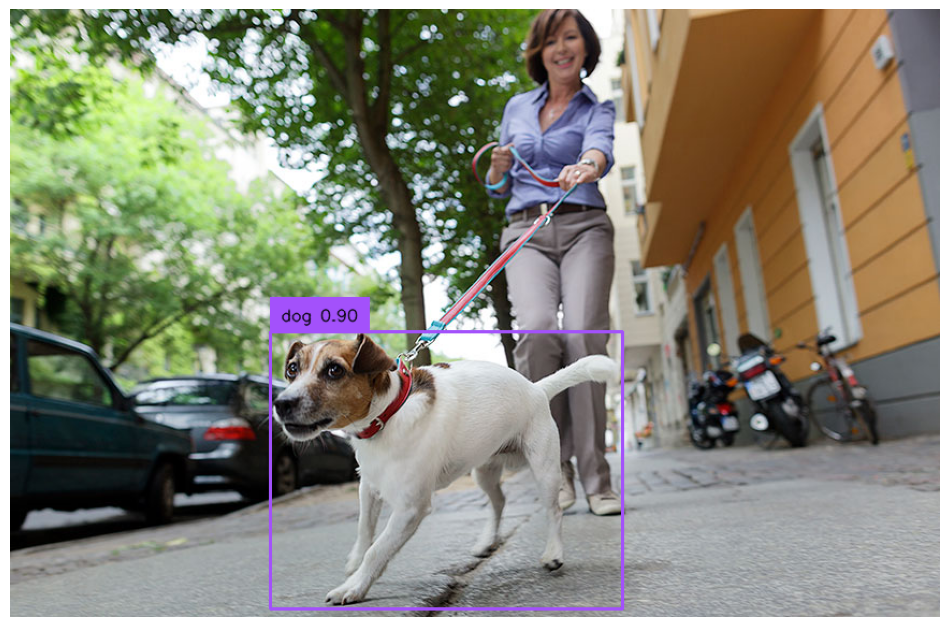

In [29]:
class_names = "dog"
image = run_image(cv2.imread('/content/car-chase.jpg'), class_names, cfg)
sv.plot_image(image)

That's great. The model is able to detect dog as well. Let's see if it can detect other objects in the image, like car.

02/13 06:17:35 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
02/13 06:17:35 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1864537083
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash

/usr/local/lib/python3.10/dist-packages/mmengine-0.10.3-py3.10.egg/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


02/13 06:17:42 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/13 06:17:42 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(9           ) YOLOv5ParamSchedulerHook           
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHo

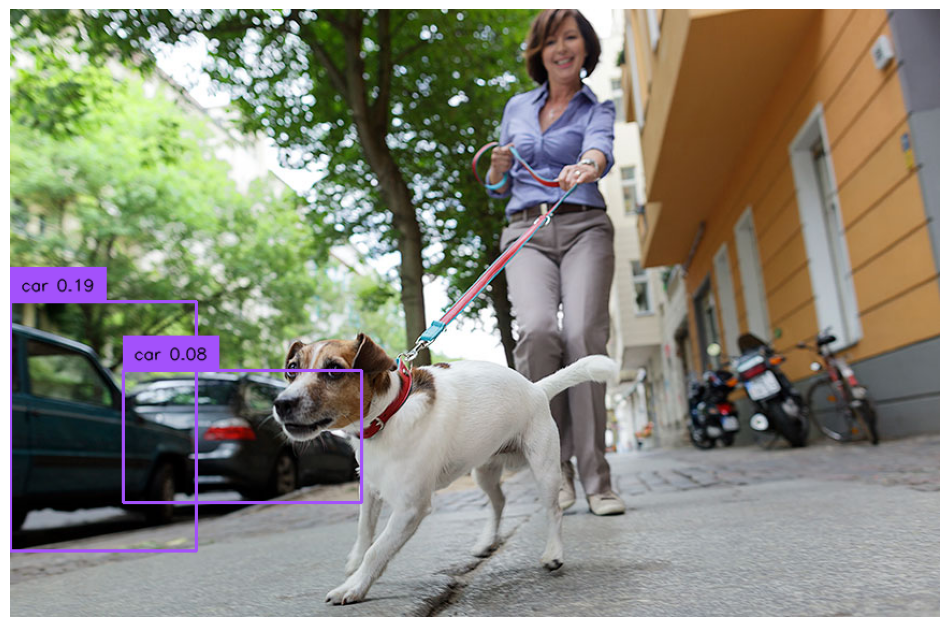

In [31]:
class_names = "car"
image = run_image(cv2.imread('/content/car-chase.jpg'), class_names, cfg)
sv.plot_image(image)

That's nice! Now let's throw it all in one go and see if it can detect all the objects in the image.

02/13 06:17:53 - mmengine - WARNING - Failed to search registry with scope "mmyolo" in the "log_processor" registry tree. As a workaround, the current "log_processor" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmyolo" is a correct scope, or whether the registry is initialized.
02/13 06:17:53 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
    CUDA available: False
    MUSA available: False
    numpy_random_seed: 1300233250
    GCC: x86_64-linux-gnu-gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
    PyTorch: 2.1.0+cu121
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v3.1.1 (Git Hash

/usr/local/lib/python3.10/dist-packages/mmengine-0.10.3-py3.10.egg/mmengine/utils/manager.py:113: UserWarning: <class 'mmdet.visualization.local_visualizer.DetLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


02/13 06:18:00 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
02/13 06:18:00 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
after_load_checkpoint:
(49          ) EMAHook                            
 -------------------- 
before_train:
(9           ) YOLOv5ParamSchedulerHook           
(VERY_HIGH   ) RuntimeInfoHook                    
(49          ) EMAHook                            
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHo

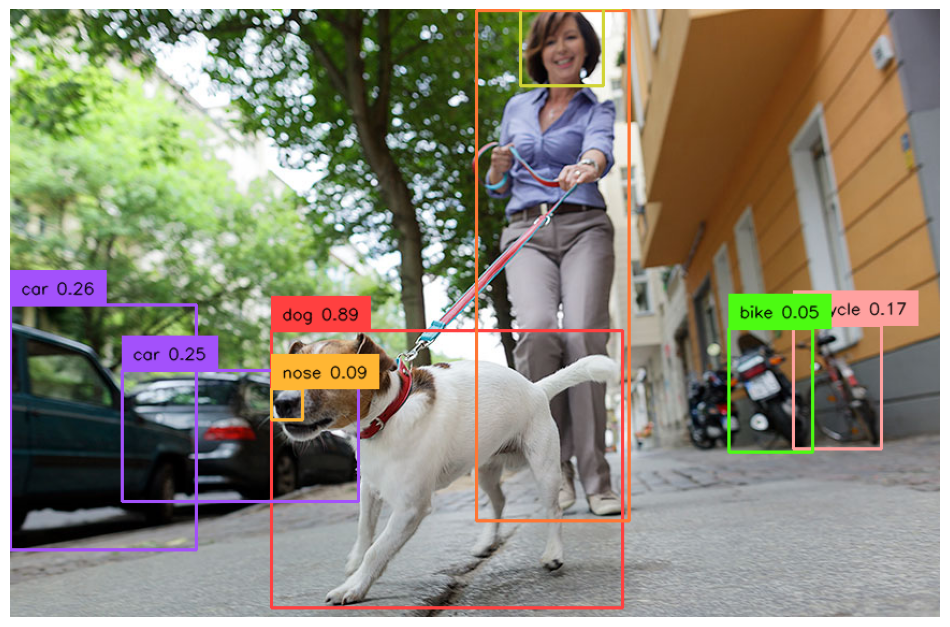

In [32]:
class_names = "car, dog, bicycle, person, nose, hair, bike"
image = run_image(cv2.imread('/content/car-chase.jpg'), class_names, cfg)
sv.plot_image(image)

Wonderful! The model is able to detect all the objects in the image. It's a very powerful model that can see beyond labels. It's a model that can identify any object you want, provided that you provide a image description to it